In [ ]:
# Unsupervised Learning:
#Dimensionality Reduction
  # Principal Component Analysis (PCA)
    # Linear dimensionality reduction using Singula Value Decomposition of the data to project it to a lower dimensional space.
    # Statistical procedure that utilise orthogonal transformation technology
    # Convert possible correlated features (predictors) into linearly uncorrelated features (predictors) called principal components
    # # of principal components <= number of features (predictors)
    # first principal component explains the largest possible variance
    # each subsequent component has the heighest variance subject to the resriction that it must be orthogonal to the precending components.
    # a collection of the components are called vectors
    # senstitive to scaling
  # Linear Discriminant Analysis (LDA)
    # Most commonly used as dimenstionality reduction technique in the pre-processing step for pattern-classification and machine learning applications
    # Goal is to project a dataset onto a lower-dimensional space with good class-seperability in order to avoid overfitting ("curse of dimensionality") and also reduce computational costs
    # Locate the 'boundaries' around clusters of classes
    # Project data points on a line
    # A centroid will be allocated to each cluster or have a centroid nearby

# PCA (Linear)
  # Used in exploratory data analysis (EDA)
  # Visualize genetic distance and relatedness between populations
  # Method:
    # Eigenvalue decomposition of a data covarience (or correlation) matrix
    # Singular value decomposition of a data matrix (After mean centering/normalizing) the data matrix for each attribute
  # Output
    # Component scores, sometimes called factor scores (the transformed variable values)
    # loadings (the weight)
  # Data compression and information preservation
  # Visualization
  # Noise filtering
  # Feature extraction and engineering


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
rnd_num = np.random.RandomState(42)
X = np.dot(rnd_num.rand(2,2),rnd_num.randn(2,500)).T

In [3]:
X.shape

(500, 2)

(np.float64(-3.36000306145041),
 np.float64(3.3314115919910354),
 np.float64(-2.881825799615855),
 np.float64(4.1556598184440166))

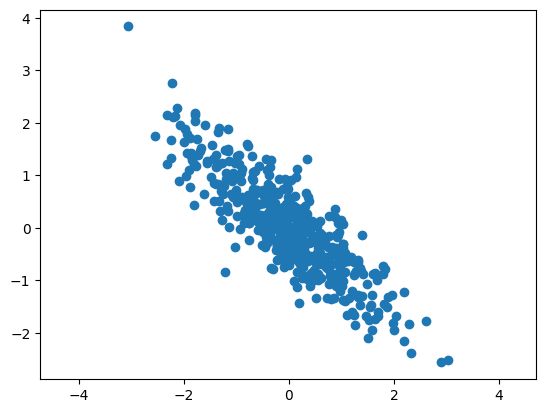

In [5]:
plt.scatter(-X[:,0],X[:,1])
plt.axis('equal')

In [6]:
#Principal Components
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(X)

PCA(n_components=2)

In [7]:
print(pca.components_)

[[ 0.74062812  0.67191517]
 [-0.67191517  0.74062812]]


In [8]:
print(pca.explained_variance_)

[1.62123504 0.12581594]


In [9]:
print(pca.explained_variance_ratio_)

[0.92798382 0.07201618]


In [17]:
pca = PCA(n_components=1)
pca.fit(X)
X_pca = pca.transform(X)
X_pca.shape

(500, 1)

In [21]:
X_new = pca.inverse_transform(X_pca)

(np.float64(-3.358021086052184),
 np.float64(3.9188024367345236),
 np.float64(-2.971613372818548),
 np.float64(4.159935417167954))

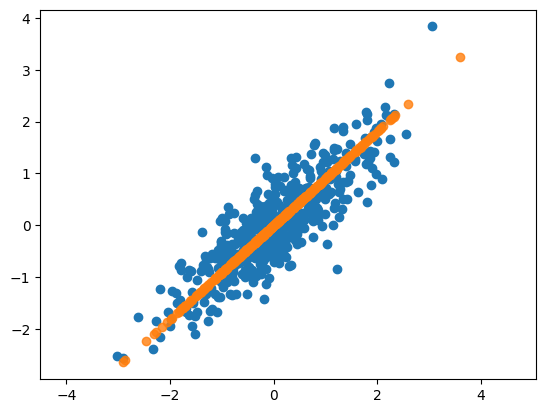

In [23]:
plt.scatter(X[:,0],X[:,1])
plt.scatter(X_new[:,0],X_new[:,1],alpha=0.8)
plt.axis('equal')

In [24]:
# Project Wine
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data

--2025-03-31 13:39:38--  https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified
Saving to: ‘wine.data’

wine.data               [ <=>                ]  10.53K  --.-KB/s    in 0s      

2025-03-31 13:39:39 (95.6 MB/s) - ‘wine.data’ saved [10782]



In [25]:
df = pd.read_csv('wine.data',header=None)
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [26]:
col_name = ['Class','Alcohol','Malic acid','Ash','Alcalinity of ash','Magnesium','Total phenols','Flavanoids','Nonflavanoid phenols','Proanthocyanins','Color intensity','Hue','OD280/OD315 of diluted wines','Proline']
df.columns = col_name

In [27]:
df.head()

,Class,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [28]:
X = df.iloc[:,1:]
X.head()

,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [29]:
Y = df['Class']
Y.head()

,Class
0,1
1,1
2,1
3,1
4,1


In [30]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [31]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_sc = sc.fit_transform(X_train)
X_test_sc = sc.transform(X_test)

In [32]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(X_train_sc)

PCA(n_components=2)

In [33]:
pca.explained_variance_ratio_

array([0.35900066, 0.18691934])

In [34]:
print(np.round(pca.explained_variance_ratio_,3))

[0.359 0.187]


In [35]:
pd.DataFrame(np.round(pca.components_,3),columns=X.columns).T

,0,1
Alcohol,0.128,0.493
Malic acid,-0.256,0.190
Ash,-0.022,0.317
Alcalinity of ash,-0.244,-0.035
Magnesium,0.148,0.262
Total phenols,0.385,0.096
Flavanoids,0.420,0.015
Nonflavanoid phenols,-0.299,0.076
Proanthocyanins,0.308,0.074
Color intensity,-0.119,0.534


In [36]:
pca = PCA(n_components=None) #if you don't know how many components to use
pca.fit(X_train_sc)

PCA()

In [37]:
pca.transform(X_train_sc)

array([[-1.16602698,  3.61532732,  1.15128454, ..., -0.1121504 ,
         0.07147567, -0.75559169],
       [-3.86261156,  0.48217746,  1.72758428, ...,  0.50457041,
        -0.18288356, -0.122403  ],
       [ 2.28353786, -1.27503318, -0.13167658, ...,  0.48017987,
        -0.45893296,  0.41585049],
       ...,
       [ 4.22339048,  2.40345929, -1.13704654, ..., -0.12930554,
        -0.20588086, -0.04785505],
       [-1.80527275, -1.49091985, -0.08991142, ..., -0.50730299,
        -0.48437788,  0.46676777],
       [-0.07808699, -1.19327925,  1.04439979, ..., -0.24025144,
         0.05180158, -0.28153725]])

In [38]:
np.cumsum(pca.explained_variance_ratio_)

array([0.35900066, 0.54592   , 0.66198557, 0.73570273, 0.80224132,
       0.85078714, 0.89273756, 0.91957678, 0.94305138, 0.96194872,
       0.97910815, 0.99173743, 1.        ])

Text(0, 0.5, 'Cumulative Explained Variance')

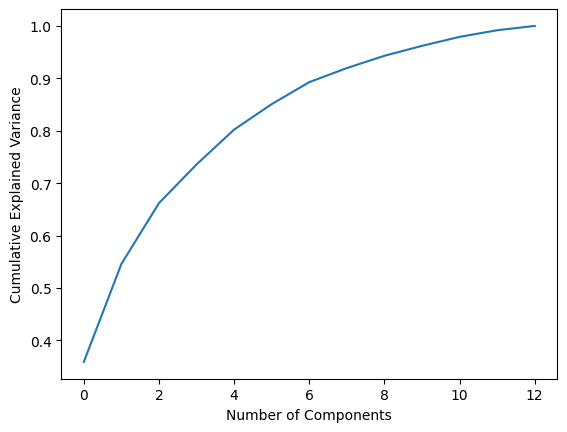

In [39]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')

In [43]:
res = pca.transform(X_train_sc)
index_name = ['PCA_'+str(k) for k in range(0,len(res))]

In [45]:
df1 = pd.DataFrame(res,columns=df.columns[1:],index=index_name)[0:4]

In [47]:
df1.T.sort_values(by='PCA_0')

,PCA_0,PCA_1,PCA_2,PCA_3
Total phenols,-3.062380,1.016510,-1.004315,-2.754779
Alcalinity of ash,-1.167179,-0.467086,-1.107830,-1.131270
Alcohol,-1.166027,-3.862612,2.283538,-1.678507
Proline,-0.755592,-0.122403,0.415850,-0.791136
Proanthocyanins,-0.639966,-0.005981,-0.481336,-0.121445
Flavanoids,-0.553745,1.257686,-0.979052,-0.666927
Hue,-0.112150,0.504570,0.480180,-0.319599
OD280/OD315 of diluted wines,0.071476,-0.182884,-0.458933,0.045823
Magnesium,0.221634,-0.226540,0.215798,-0.003420
Color intensity,0.262397,-0.453600,-0.777822,-0.123055


In [50]:
# Kernel PCA
#non-linear dimensionality reduction through the use of kernals

from sklearn.datasets import make_circles
from sklearn.decomposition import PCA, KernelPCA

np.random.seed(0)
X,Y = make_circles(n_samples=400, factor=.3, noise=.05)

In [52]:
kpca = KernelPCA(kernel='rbf', fit_inverse_transform=True, gamma=10)
X_kpca = kpca.fit_transform(X)
X_back = kpca.inverse_transform(X_kpca)

In [53]:
pca = PCA()
X_pca = pca.fit_transform(X)

Text(0, 0.5, '$x_2$')

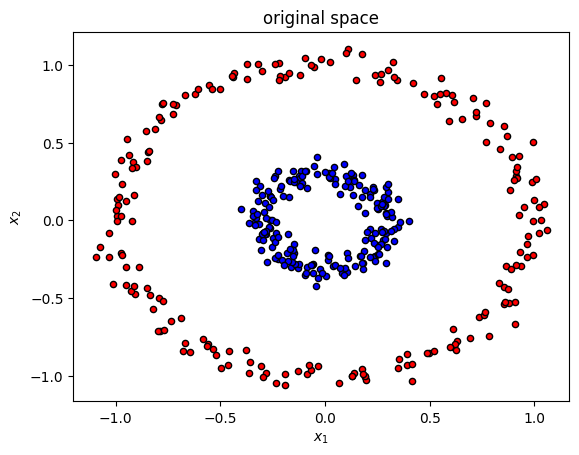

In [55]:
#Normal plot
plt.figure()
plt.title('original space')
reds = Y==0
blues = Y==1

plt.scatter(X[reds,0],X[reds,1],c="red",s=20,edgecolors='k')
plt.scatter(X[blues,0],X[blues,1],c="blue",s=20,edgecolors='k')
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')

Text(0, 0.5, '2nd component')

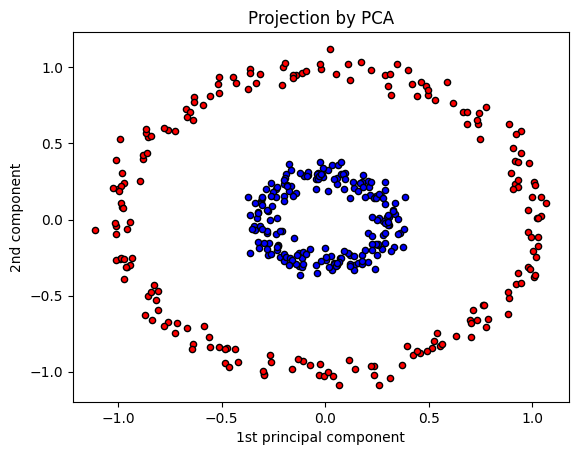

In [58]:
#PCA plot
plt.scatter(X_pca[reds,0],X_pca[reds,1],c="red",s=20,edgecolors='k')
plt.scatter(X_pca[blues,0],X_pca[blues,1],c="blue",s=20,edgecolors='k')
plt.title("Projection by PCA")
plt.xlabel('1st principal component')
plt.ylabel('2nd component')

Text(0, 0.5, '2nd component')

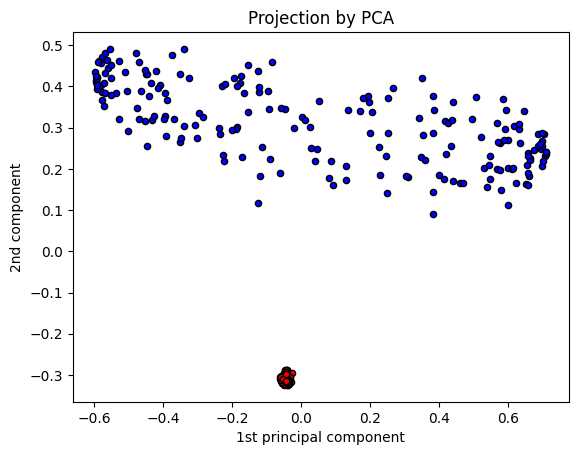

In [59]:
#KPCA plot
plt.scatter(X_kpca[reds,0],X_kpca[reds,1],c="red",s=20,edgecolors='k')
plt.scatter(X_kpca[blues,0],X_kpca[blues,1],c="blue",s=20,edgecolors='k')
plt.title("Projection by PCA")
plt.xlabel('1st principal component')
plt.ylabel('2nd component')

In [68]:
# Kernal PCA Example

df = sns.load_dataset('iris')
df = df[df['species'] != 'setosa']

col = ['petal_length','petal_width']
X = df.loc[:,col]
species_to_num = {'virginica':1,'versicolor':0}
df['tmp'] = df['species'].map(species_to_num)
Y = df['tmp']

In [69]:
kpca = KernelPCA(kernel='rbf', n_components=2)
X_kpca = kpca.fit_transform(X)

In [70]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(solver='lbfgs')
clf.fit(X,Y)

LogisticRegression()

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


Text(0, 0.5, 'petal width')

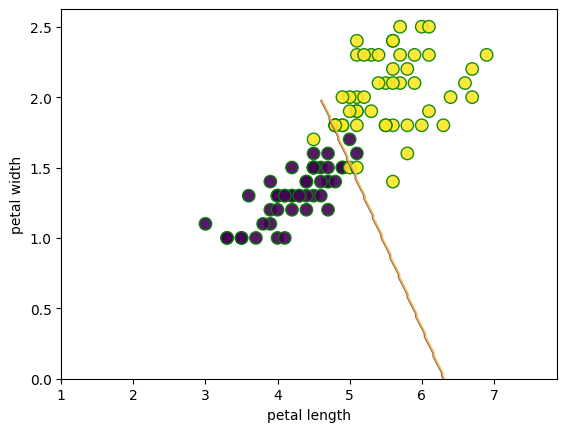

In [71]:
Xv = X.values.reshape(-1,1)
h = 0.02
x_min, x_max = Xv.min(), Xv.max() + 1
y_min, y_max = Y.min(), Y.max() + 1

xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
ax = plt.contour(xx,yy,Z,cmap='afmhot',alpha=0.3)
plt.scatter(X.values[:,0],X.values[:,1],c=Y,s=80,edgecolors='g',alpha=0.9)
plt.xlabel('petal length')
plt.ylabel('petal width')

In [72]:
clf.fit(X_kpca,Y)

LogisticRegression()

Text(0, 0.5, 'petal width')

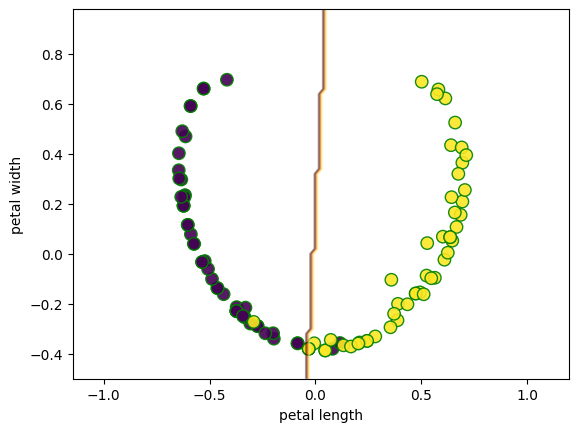

In [75]:
Xv = X_kpca
h = 0.02
x_min, x_max = Xv.min()-0.5, Xv.max() + 0.5
y_min, y_max = Y.min()-0.5, Y.max()
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
ax = plt.contour(xx,yy,Z,cmap='afmhot',alpha=0.3)
plt.scatter(X_kpca[:,0],X_kpca[:,1],c=Y,s=80,edgecolors='g',alpha=0.9)
plt.xlabel('petal length')
plt.ylabel('petal width')

In [76]:
# LDA vs PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [77]:
clf = LinearDiscriminantAnalysis()
clf.fit(X,Y)

LinearDiscriminantAnalysis()

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearDiscriminantAnalysis was fitted with feature names
  warnings.warn(


Text(0, 0.5, 'petal width')

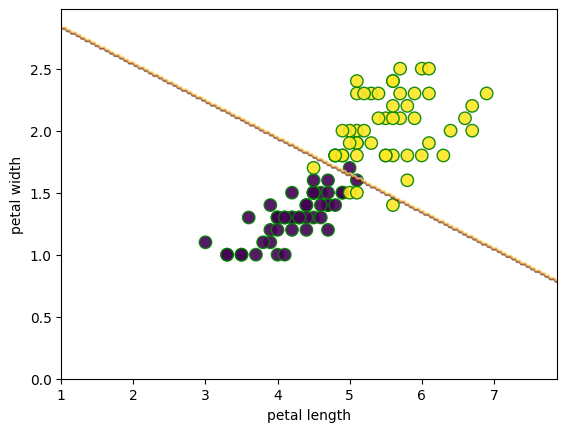

In [78]:
Xv = X.values.reshape(-1,1)
h = 0.02
x_min, x_max = Xv.min(), Xv.max() + 1
y_min, y_max = Y.min(), Y.max() + 2

xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
ax = plt.contour(xx,yy,Z,cmap='afmhot',alpha=0.3)
plt.scatter(X.values[:,0],X.values[:,1],c=Y,s=80,edgecolors='g',alpha=0.9)
plt.xlabel('petal length')
plt.ylabel('petal width')

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
#Project Abalone
!wget http://archive.ics.uci.edu/ml/machine-learning-databases/abalone/abalone.data

--2025-04-01 07:47:46--  http://archive.ics.uci.edu/ml/machine-learning-databases/abalone/abalone.data
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified
Saving to: ‘abalone.data.1’

abalone.data.1          [   <=>              ] 187.38K   321KB/s    in 0.6s    

2025-04-01 07:47:47 (321 KB/s) - ‘abalone.data.1’ saved [191873]



In [4]:
df1 = pd.read_csv('abalone.data',header=None)

In [5]:
df1.head()

,0,1,2,3,4,5,6,7,8
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [8]:
X = df1.iloc[:,1:]

In [9]:
X.head()

,1,2,3,4,5,6,7,8
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [10]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
from sklearn.decomposition import PCA
pca = PCA(n_components=None)
X_sc = sc.fit_transform(X)
pca.fit(X_sc)
np.cumsum(pca.explained_variance_ratio_)

array([0.83905489, 0.92600651, 0.9583119 , 0.97906064, 0.98967934,
       0.99761344, 0.99920021, 1.        ])

Text(0, 0.5, 'Cumulative Explained Variance')

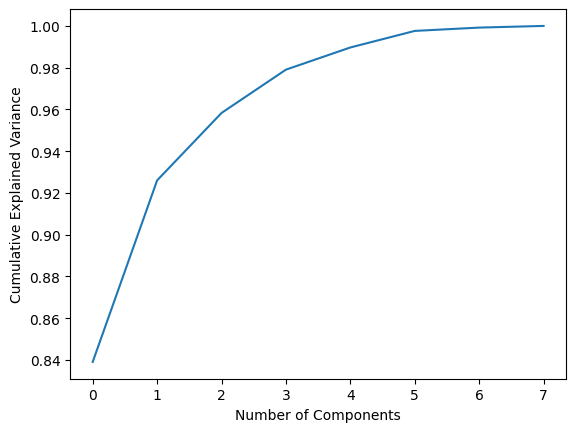

In [11]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')